# Wind analysis assignment. 

The main goal of this assignment is to learn how to manage real weather information in order to stimate the energy potential of a specific location.

Libraries needed in this exercice

In [43]:
import sys
import math
import numpy as np
import pandas as pd
import datetime as dt
import scipy.stats as s
import matplotlib.pyplot as plt
%matplotlib inline

Python version

In [44]:
sys.version

'2.7.11 |Anaconda 2.3.0 (32-bit)| (default, Mar  4 2016, 15:18:41) [MSC v.1500 32 bit (Intel)]'

## Read csv file with weather information

headers = ['col1', 'col2', 'col3', 'col4']

dtypes = ['datetime', 'datetime', 'str', 'float']

pd.read_csv(file, sep='\t', header=None, names=headers, dtype=dtypes)

In [45]:
def parse_dates(x):
    return dt.datetime.strptime(x,'%Y-%m-%d %H:%M:%S.%f')

In [46]:
headers=['time','WindSpeed','WindDir','SolarRad','AmbTemp']
df = pd.read_csv('./weather_data_01.csv', delimiter=";", header=1, names=headers, parse_dates=[0], date_parser=parse_dates)

In [47]:
headers=['time','WindSpeed','WindDir','SolarRad','AmbTemp']
df1 = pd.read_csv('./weather_data_01.csv', delimiter=";", header=1, names=headers)
print(df1.dtypes)


time          object
WindSpeed    float64
WindDir        int64
SolarRad       int64
AmbTemp      float64
dtype: object


In [48]:
print(list(df))
print(df.dtypes)
df.head()

['time', 'WindSpeed', 'WindDir', 'SolarRad', 'AmbTemp']
time         datetime64[ns]
WindSpeed           float64
WindDir               int64
SolarRad              int64
AmbTemp             float64
dtype: object


,time,WindSpeed,WindDir,SolarRad,AmbTemp
0,2013-01-01 00:10:00,6.1,256,0,7.0
1,2013-01-01 00:15:00,5.4,253,0,6.8
2,2013-01-01 00:20:00,5.8,252,0,6.8
3,2013-01-01 00:25:00,5.6,254,0,6.7
4,2013-01-01 00:30:00,5.1,246,0,6.6


In [49]:
print(df)

                     time  WindSpeed  WindDir  SolarRad  AmbTemp
0     2013-01-01 00:10:00        6.1      256         0      7.0
1     2013-01-01 00:15:00        5.4      253         0      6.8
2     2013-01-01 00:20:00        5.8      252         0      6.8
3     2013-01-01 00:25:00        5.6      254         0      6.7
4     2013-01-01 00:30:00        5.1      246         0      6.6
5     2013-01-01 00:35:00        5.2      240         0      6.6
6     2013-01-01 00:40:00        5.4      239         0      6.7
7     2013-01-01 00:45:00        5.3      235         0      6.7
8     2013-01-01 00:50:00        5.6      239         0      6.7
9     2013-01-01 00:55:00        5.8      238         0      6.6
10    2013-01-01 01:00:00        6.5      240         0      6.4
11    2013-01-01 01:05:00        6.4      236         0      6.2
12    2013-01-01 01:10:00        5.9      231         0      6.1
13    2013-01-01 01:15:00        5.1      225         0      5.8
14    2013-01-01 01:20:00

In [50]:
N=len(df.index)
print('Number of measurements: ' + str(N))

Number of measurements: 85190


## Filter data according datetime criteria

Another way of doing this. In this approach time should be the index ix.

df.ix[datetime.date(year=2013,month=1,day=1):datetime.date(year=2013,month=1,day=31)]

In [51]:
rdf=df[(df['time'] > '2013-01-01 00:00:00') & (df['time'] < '2013-02-01 00:00:00')]
Nrdf=len(rdf.index)
print('Number of measurements: ' + str(Nrdf))

Number of measurements: 7281


In [52]:
print(rdf)

                    time  WindSpeed  WindDir  SolarRad  AmbTemp
0    2013-01-01 00:10:00        6.1      256         0      7.0
1    2013-01-01 00:15:00        5.4      253         0      6.8
2    2013-01-01 00:20:00        5.8      252         0      6.8
3    2013-01-01 00:25:00        5.6      254         0      6.7
4    2013-01-01 00:30:00        5.1      246         0      6.6
5    2013-01-01 00:35:00        5.2      240         0      6.6
6    2013-01-01 00:40:00        5.4      239         0      6.7
7    2013-01-01 00:45:00        5.3      235         0      6.7
8    2013-01-01 00:50:00        5.6      239         0      6.7
9    2013-01-01 00:55:00        5.8      238         0      6.6
10   2013-01-01 01:00:00        6.5      240         0      6.4
11   2013-01-01 01:05:00        6.4      236         0      6.2
12   2013-01-01 01:10:00        5.9      231         0      6.1
13   2013-01-01 01:15:00        5.1      225         0      5.8
14   2013-01-01 01:20:00        4.9     

## Some statistical data

In [53]:
np.mean(rdf['WindSpeed'])

4.659950556242266

In [54]:
np.min(rdf['WindSpeed'])

0.20000000000000001

In [55]:
np.max(rdf['WindSpeed'])

15.199999999999999

(4.2463249752758152, 1.7587235048049086)
(0.20000000000000001, 15.199999999999999)


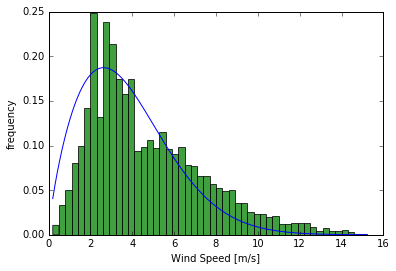

In [56]:
def weib(x,n,a):
    return (a / n) * (x / n)**(a - 1) * np.exp(-(x / n)**a)


data=rdf['WindSpeed']

(loc, scale) = s.exponweib.fit_loc_scale(data, 0.1, 0.5)
print(loc, scale)

print(data.min(),data.max())


x = np.linspace(data.min(), data.max(), 1000)

#plt.plot(data)

plt.plot(x, weib(x, loc, scale))
n, bins, patches = plt.hist(data, 50, normed=1, facecolor='green', alpha=0.75)
plt.xlabel('Wind Speed [m/s]')
plt.ylabel('frequency')
plt.show()

The data measured during the month of January has 7281 '5-minute' intervals.

Compute the number of 5-minute intervals in a month of January without measuring gaps.

In [57]:
intervals=31*24*12
print('Number of 5-minute intervals in January: ' + str(intervals))

Number of 5-minute intervals in January: 8928


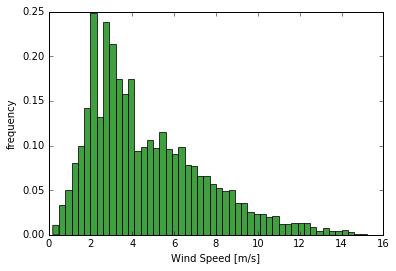

In [58]:
n, bins, patches = plt.hist(data, 50, normed=1, facecolor='green', alpha=0.75)
plt.xlabel('Wind Speed [m/s]')
plt.ylabel('frequency')
plt.show()

In [59]:
print(bins)

[  0.2   0.5   0.8   1.1   1.4   1.7   2.    2.3   2.6   2.9   3.2   3.5
   3.8   4.1   4.4   4.7   5.    5.3   5.6   5.9   6.2   6.5   6.8   7.1
   7.4   7.7   8.    8.3   8.6   8.9   9.2   9.5   9.8  10.1  10.4  10.7
  11.   11.3  11.6  11.9  12.2  12.5  12.8  13.1  13.4  13.7  14.   14.3
  14.6  14.9  15.2]


In [60]:
print(np.diff(bins))

[ 0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3
  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3
  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3  0.3
  0.3  0.3  0.3  0.3  0.3]


In [61]:
print(n)

[ 0.01052969  0.03342032  0.05035938  0.0801172   0.09934533  0.1419219
  0.24813441  0.13139221  0.23806254  0.21425628  0.17396878  0.15794534
  0.1748844   0.09339376  0.09888752  0.1057547   0.09705627  0.11491096
  0.09659845  0.09064689  0.0984297   0.07782814  0.07691251  0.06638282
  0.06592501  0.05676876  0.05219063  0.04944376  0.05035938  0.03525157
  0.03570938  0.02609532  0.02334844  0.02289063  0.01968594  0.02060157
  0.01236094  0.01236094  0.01281875  0.01281875  0.01327656  0.00915625
  0.00457813  0.007325    0.00457813  0.00457813  0.00549375  0.00274688
  0.00045781  0.00137344]


In [62]:
sum(n)

3.3333333333333348

In [63]:
print(sum(n*np.diff(bins)))

1.0
